In [64]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
import os, datetime
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import datasets, layers, models
from PIL import Image
import pydotplus
import pydot

In [66]:
# !pip install pydotplus pydot

In [67]:
base_dir = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

In [68]:
scaled_train = ImageDataGenerator( rescale = 1.0/255. )
scaled_test = ImageDataGenerator( rescale = 1.0/255. )
scaled_valid = ImageDataGenerator( rescale = 1.0/255. )

In [69]:
train_generator = scaled_train.flow_from_directory(train_dir, batch_size=100, class_mode='binary', target_size=(256, 256))

validation_generator = scaled_valid.flow_from_directory(valid_dir, batch_size=100, class_mode='binary', target_size=(256, 256))

test_generator = scaled_test.flow_from_directory(test_dir, batch_size=100, class_mode='binary', target_size=(256, 256))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


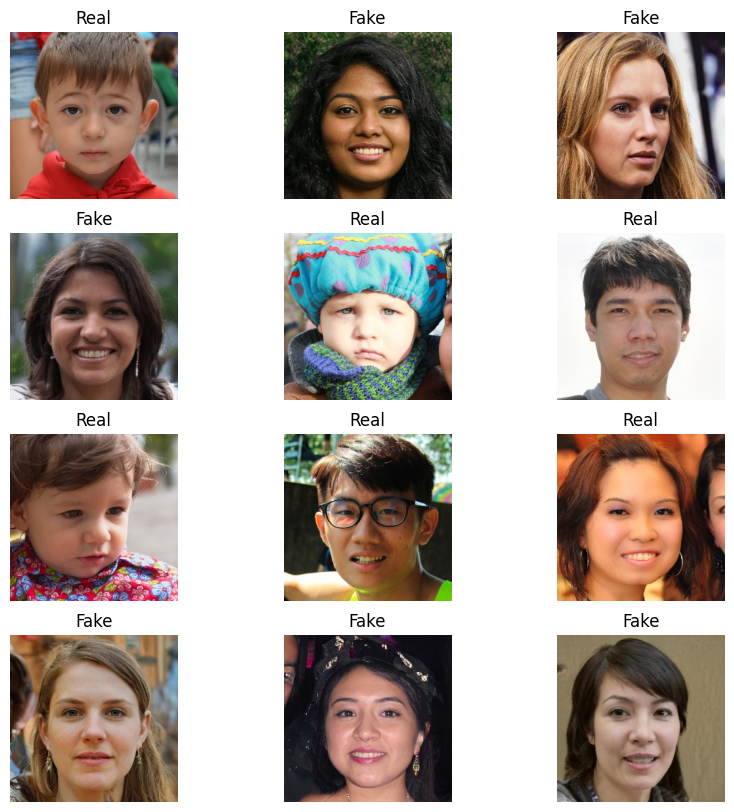

In [70]:
plt.figure(figsize=(10, 10))
for i in range(12):
    img, label = next(train_generator)
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("Fake")
    else:
        plt.title("Real")
    plt.axis("off")

In [71]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(1064, activation= 'relu'))
model.add(layers.Dense(2, activation='softmax'))


In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1064)                │     122,573,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           2,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,669,242 (467.95 MB)

 Trainable params: 122,669,242 (467.95 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [74]:
%%time
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10, validation_steps = 50, verbose=1)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 345s 333ms/step - accuracy: 0.6875 - loss: 0.7364 - val_accuracy: 0.8426 - val_loss: 0.3590
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 326s 323ms/step - accuracy: 0.8665 - loss: 0.3124 - val_accuracy: 0.9026 - val_loss: 0.2342
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 322s 320ms/step - accuracy: 0.9356 - loss: 0.1639 - val_accuracy: 0.9364 - val_loss: 0.1598
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 319s 316ms/step - accuracy: 0.9682 - loss: 0.0855 - val_accuracy: 0.9338 - val_loss: 0.1714
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 318s 316ms/step - accuracy: 0.9844 - loss: 0.0416
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 328s 326ms/step - accuracy: 0.9891 - loss: 0.0294 - val_accuracy: 0.9340 - val_loss: 0.2201
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 329s 326ms/step - accuracy: 0.9922 - loss: 0.0216 - val_accuracy: 0.9442 - val_loss: 0.2367
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 330s 328ms/step - accuracy: 0.9937 - loss: 0.0180 - val_accura

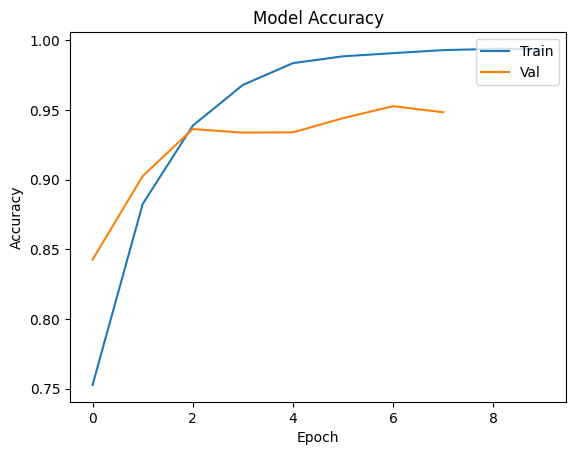

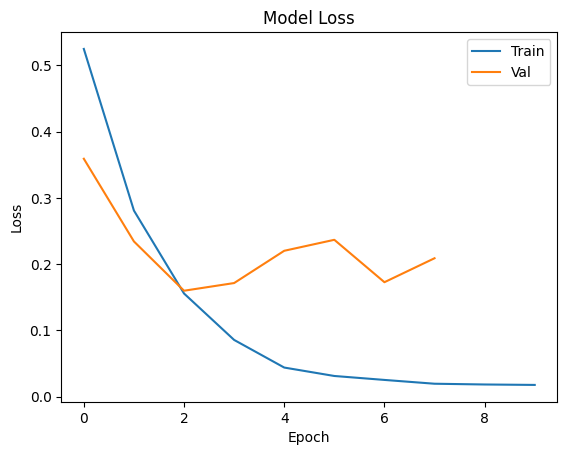

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [91]:
test_loss, test_acc = model.evaluate(test_generator)

200/200 ━━━━━━━━━━━━━━━━━━━━ 79s 390ms/step - accuracy: 0.9502 - loss: 0.2374


In [92]:

class_names = ['fake', 'real']

In [93]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/0C28G3DC1O.jpg', target_size=(256, 256, 3))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
test_generator.class_indices

print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[1. 0.]]


In [94]:
print(
    "This image is {:.2f} percentage {}."
    .format(100 * np.max(result), class_names[np.argmax(result)])
)

This image is 100.00 percentage fake.


In [95]:
# Save the model in the TensorFlow SavedModel format
model.save(filepath= '/kaggle/working/my_model.h5')


## Run the saved model on local machine.

In [96]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [97]:
# Load the saved model
model = tf.keras.models.load_model('/kaggle/working/my_model.h5')


In [98]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1064)                │     122,573,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           2,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,669,244 (467.95 MB)

 Trainable params: 122,669,242 (467.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [99]:
class_names = ['fake', 'real']

In [100]:
# Load and preprocess the image

test_image = image.load_img('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/0C28G3DC1O.jpg', target_size=(256, 256, 3))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
# test_generator.class_indices

# print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


In [101]:
print(
    "This image is {:.2f} percentage {}."
    .format(100 * np.max(result), class_names[np.argmax(result)])
)

This image is 100.00 percentage fake.
